# Homework 1

`airbnb.csv` 데이터셋은 airbnb에 등록된 샌프란시스코 지역의 listing 데이터의 일부이다. 

- 'id': listing id
- 'room_type': 집 또는 방의 형태 (entire home/apt, private room, shared room)
- 'number_of_reviews': 총 리뷰 수
- 'review_scores_rating': 전체 리뷰 점수 
- 'review_scores_accuracy', 'review_scores_cleanliness','review_scores_checkin', 'review_scores_communication','review_scores_location', 'review_scores_value': 각 부분의 리뷰 점수
- 'reviews_per_month': 월 평균 리뷰 수 
- 'Downtown': Downtown까지의 거리 
- 'PerCapitaIncome': 해당 지역의 소득수준
- 'most_freq_aspect': listing description에서 가장 많이 나타난 주제

아래의 질문에 답하기 위해 적절한 통계량/그래프를 출력하고 서술하시오. 완성된 답안은 **html** 파일로 다운받아 제출하시오. (File>Download as>HTML)


In [3]:
import pandas as pd
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust

import seaborn as sns
import matplotlib.pylab as plt
data = pd.read_csv('../data/airbnb.csv')

#### 1. 데이터가 포함한 다음 변수의 종류를 구분하시오.
- id: 범주
- room_type: 범주
- number_of_reviews:수치
- Downtown: 수치
- most_freq_aspect: 범주

In [4]:
data.head()

,id,room_type,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,Downtown,PerCapitaIncome,most_freq_aspect
0,958,Entire home/apt,222.0,97.0,10.0,10.0,10.0,10.0,10.0,9.0,1.77,4068.132073,110777,int_style
1,3850,Private room,167.0,95.0,10.0,10.0,10.0,10.0,10.0,10.0,1.33,6792.053605,93008,comm
2,5858,Entire home/apt,111.0,98.0,10.0,10.0,10.0,10.0,10.0,9.0,0.87,5666.128342,69778,nature
3,7918,Private room,18.0,86.0,8.0,8.0,9.0,9.0,9.0,8.0,0.15,5573.866947,99041,comm
4,8142,Private room,8.0,93.0,9.0,9.0,10.0,10.0,9.0,9.0,0.13,5632.882874,99041,comm


#### 2. `reviews_per_month`의 평균, 중위수를 계산하고 비교하여 분포의 모양을 추측해보시오. 

In [5]:
data.reviews_per_month.describe()

count    6105.000000
mean        1.888251
std         2.089904
min         0.010000
25%         0.310000
50%         1.030000
75%         2.870000
max        18.000000
Name: reviews_per_month, dtype: float64

#### 3. `reviews_per_month`의 히스토그램을 통해 위에서 추측한 사실이 맞는지 확인해보시오. 

<AxesSubplot:>

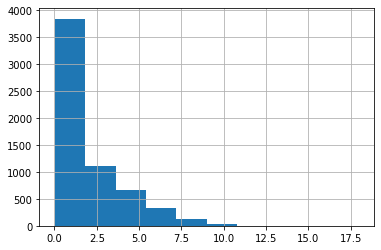

In [6]:
data.reviews_per_month.hist()

#### 4. `reviews_per_month`의 평균과 중위수를 각 `room_type`별로 계산하여 비교하시오.

In [8]:
data.room_type.value_counts()

Entire home/apt    3557
Private room       2396
Shared room         152
Name: room_type, dtype: int64

In [9]:
data.groupby('room_type').reviews_per_month.describe()

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,3557.0,1.530804,1.881784,0.01,0.2500,0.750,2.000,11.02
Private room,2396.0,2.434912,2.283888,0.01,0.4975,1.815,3.800,18.00
Shared room,152.0,1.635855,1.618207,0.01,0.2275,0.735,2.965,6.10


#### 5. `reviews_per_month`의 Boxplot을  `room_type`별로 그려서 비교하시오.

<AxesSubplot:xlabel='room_type', ylabel='reviews_per_month'>

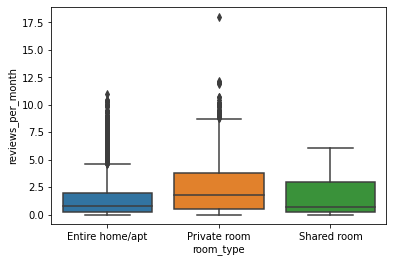

In [10]:
sns.boxplot(x="room_type", y="reviews_per_month", data= data)

#### 6. `most_freq_aspect`의 도수분포표를 출력하고 이를 활용해 bar plot을 그려서 어떤 aspect가 가장 빈번하게 나타났는지 확인하시오.

In [11]:
data.most_freq_aspect.value_counts()

comm          1187
bldg           911
int_style      802
nbhd           683
attr_trans     658
facil          498
visitor        479
nature         357
bedroom        326
kitchen        204
Name: most_freq_aspect, dtype: int64

<AxesSubplot:>

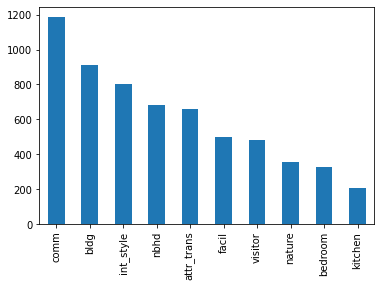

In [12]:
data.most_freq_aspect.value_counts().plot.bar()

#### 7. `room_type`과 `most_freq_aspect`의 mosaic plot을 통해 room type에 따라 자주 나타나는 aspect의 특징이 다른지 비교하시오.

In [14]:
data.most_freq_aspect.value_counts()

comm          1187
bldg           911
int_style      802
nbhd           683
attr_trans     658
facil          498
visitor        479
nature         357
bedroom        326
kitchen        204
Name: most_freq_aspect, dtype: int64

In [17]:
data.most_freq_aspect = data.most_freq_aspect.astype('category')

In [18]:
data.dtypes

id                                int64
room_type                        object
number_of_reviews               float64
review_scores_rating            float64
review_scores_accuracy          float64
review_scores_cleanliness       float64
review_scores_checkin           float64
review_scores_communication     float64
review_scores_location          float64
review_scores_value             float64
reviews_per_month               float64
Downtown                        float64
PerCapitaIncome                   int64
most_freq_aspect               category
dtype: object

In [24]:
data.most_freq_aspect = data.most_freq_aspect.cat.reorder_categories(data.most_freq_aspect.value_counts().index.to_list())

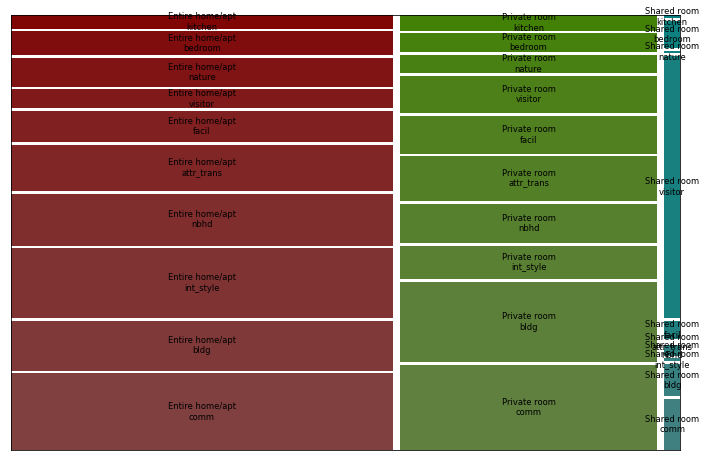

In [25]:
from statsmodels.graphics.mosaicplot import mosaic
plt.rcParams['figure.figsize'] = [12, 8]
mosaic(data.sort_values('most_freq_aspect'), ['room_type', 'most_freq_aspect'],axes_label=False, gap=0.01)
plt.show()

#### 8. 7개의 review_scores 변수들과 `Downtown`, `PerCapitaIncome`, `reviews_per_month` 변수와의 상관계수 행렬과 그것의 heatmap을 통해 변수들 간의 상관관계를 관찰하고 서술하시오.

In [30]:
data.columns.str.contains('review_')

array([False, False, False,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False])

In [33]:
data_score = data.loc[:, data.columns.str.contains('review_|Down|Per|reviews_per')]

In [34]:
data_score.corr()

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,Downtown,PerCapitaIncome
review_scores_rating,1.000000,0.705048,0.666860,0.485924,0.637921,0.451721,0.686506,0.078814,0.054043,0.125469
review_scores_accuracy,0.705048,1.000000,0.611907,0.462369,0.586284,0.359659,0.570344,0.135251,0.084931,0.063065
review_scores_cleanliness,0.666860,0.611907,1.000000,0.391978,0.496237,0.304013,0.533109,0.131440,0.057903,0.080729
review_scores_checkin,0.485924,0.462369,0.391978,1.000000,0.548370,0.277141,0.411180,0.134380,0.094603,0.032955
review_scores_communication,0.637921,0.586284,0.496237,0.548370,1.000000,0.294792,0.512375,0.124630,0.096165,0.049202
review_scores_location,0.451721,0.359659,0.304013,0.277141,0.294792,1.000000,0.425748,0.075669,-0.080912,0.298409
review_scores_value,0.686506,0.570344,0.533109,0.411180,0.512375,0.425748,1.000000,0.111472,0.083281,0.068504
reviews_per_month,0.078814,0.135251,0.131440,0.134380,0.124630,0.075669,0.111472,1.000000,0.267295,-0.143245
Downtown,0.054043,0.084931,0.057903,0.094603,0.096165,-0.080912,0.083281,0.267295,1.000000,-0.314239
PerCapitaIncome,0.125469,0.063065,0.080729,0.032955,0.049202,0.298409,0.068504,-0.143245,-0.314239,1.000000


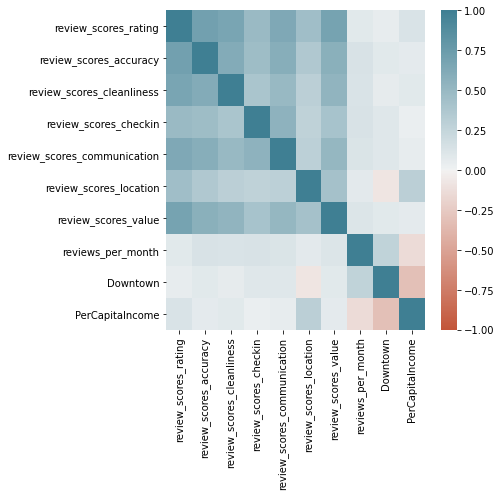

In [37]:
fig, ax = plt.subplots(figsize=(7, 7))
ax = sns.heatmap(data_score.corr(), vmin=-1, vmax=1, 
                 cmap=sns.diverging_palette(20, 220, as_cmap=True),
                 ax=ax)

plt.tight_layout()
plt.show()